# Prétraitement d'images satellitaires Q4

## Enoncé :
Le prétraitement est l’ensemble des opérations requises avant l’analyse principale et
l’extraction de l’information, son but est de fournir à partir des images brutes des images
améliorées.
L'objectif de TP2 est présenté quelques opérations de prétraitement des images satellitaires,
nous allons donc voir comment faire quelques opérations comme les opérations géométriques,
la compression, le rehaussement de contraste et la restauration.
Pour l'application considérée nous allons utiliser une image acquise par le satellite LANDSAT 7
ETM+ (Enhanced Thematic Mapper plus) des zones côtières de Sumatra, en Indonésie, la date
d'acquisition est 14 Mai 2002. L’image est une composition naturelle de trois canaux : bandes
de ETM1, ETM2 et ETM3, sa taille en pixels 5760x7200 et elle contient les différentes classes
suivantes : la végétation, l'eau, les zones urbaines et non végétales.

Etape 4 : Reduction du bruit
Pour améliorer la qualité visuelle de l’image, on doit éliminer les effets des bruits (parasites) en
lui faisant subir un traitement appelé filtrage. Le principe des filtrages est de modifier la valeur
numérique de chaque pixel en fonction des valeurs des pixels voisins.
Pour cette dernière partie vous devrez :
- Création de quatre fonctions (si possible deux pour chaque type de filtre linéaire et non
linéaire) puis appliquer les filtres sur une image satellitaire aux niveaux de gris et
observer l’effet de ce prétraitement sur l’image et sur l’histogramme.
- Mesurer l’amélioration en calculant l’erreur quadratique moyenne entre l’image
originale et l’image filtrée (ou restaurée

In [2]:
import numpy as np
import time
import cv2
import matplotlib.image as mpimg    
import matplotlib.pyplot as plt    
import sys
from PIL import Image
from scipy import ndimage
from scipy import misc

## Etape 4

In [3]:
def ReadAffiche(ImageFile):
    try:
            img = mpimg.imread(ImageFile) #ImageFile est un input string of file text name (with extension) or with path
    except IOError: ##le cas si pas de fichier a lire
        print('Erreur sur ouverture du fichier ' + ImageFile)
        sys.exit(1)
        
        
    # affichage des caractéristiques de l'image
    Taillex,Tailley,z=img.shape    
    print("largeur:",Taillex,"hauteur:",Tailley)
    
    
    # affichage de l'image
    print(ImageFile+" :")
    
    plt.imshow(img)
    plt.show()
    return img

In [4]:
def eqm(og,mod):#og et mod sont des chaine de caracter de nom de fichier image pour l'image original et 
                #image modifié (PAR ORDRE)
    imgOG=ReadAffiche(og)
    imgMOD=ReadAffiche(mod)
    
    m,n,l=imgOG.shape #les variable m et n de taille d'image original sufiit car il a la 
                    #meme taille que celle d'image modifié
    
    eqm=0 #eqm initial
    
    c=0
    while(c<l):
        x=0 #coordonée d'image originale et celle du modifié (car ces 2 images ont la meme dimension)    
        while(x<m): ##jusqua largeur de TMj.BMP
            y=0
            while(y<n):##jusqua hauteur de TMj.BMP 

                eqm=eqm+(   np.abs( imgOG[x,y,c]-imgMOD[x,y,c] )   )**2 #formulation du sommation par des 
                                                                        #3 boucles imbriques au niveau de longueur,largeur et niveau du couleur 

                y=y+1
            x=x+1
        c=c+1
    
    return eqm/(m*n) ##on met au final la divion sur les dimensions m et n


##compare image original (bmp) avec png
#print(eqm('test.bmp','test.png'))



# le fonction lisse mbe use filtre bas principe 
# son genre depend du masque d'entree

## A-filtre lineaire
### NB: ceci en bas fonction du filtre lineaire generalisé lisse() dont le genre exact de filtrage depend du filtre utilisée 

In [5]:
def lisse(ImageFile,v):#Imagefile :filename of input image
                            #v filtre utilisé    
    #k nb des lines ou colone symetrique pour chaque filtre moyenne de taille impair
    #v est un filtre:
    import numpy as np
    img=mpimg.imread(ImageFile)
    #ig=0.21*img[:,:,0]+0.71*img[:,:,1]+0.07*img[:,:,2]
    #ig=0.21*img[:,:,0]+0.71*img[:,:,1]+0.07*img[:,:,2]
    
    
    #deduction de k (nb des 2 dans la taille du filtre)
    sizex,sizey,c=img.shape
    vx,vy=v.shape
    k=int((vx-1)/2)
    print(k)
    
    
    

    
    maqam=0    #maqam est somme de tous les elt du filtre
    
    #calcul du var maqam
    i=0    
    while(i<=2*k+1-1):
        j=0
        while(j<=2*k+1-1):
            maqam=maqam+v[i,j]
            j=j+1
        i=i+1
    
    print("moy=",maqam)
    ir=np.zeros([sizex+k, sizey+k, 3])

    idr=0 #id region 
    NRMax=50 #nb region max
    arrayReg=[] #ensemble des region
    i=0
    j=0
    scpt=0#compteur d'operation execute en total
    c=0 ###TEMP FIX pour simuler image noir et blanc (image contour)
    while(c<=2):
        x=k 
        while(x<sizex):
            y=k
            while(y<sizey):
                s=0.0
                i=0
                ii=k
                cpi=0 #compteur d'operation execute en dans les 2 boucle interne de recherce des pixel voisin pour current pixel du tratiment generrale
                while(ii>=(-1)*k):
                    j=0
                    jj=(-1)*k
                    while(jj<=k):
                        s=s+img[int(x-k+ii),int(y-k+jj),c]*v[i,j]
                        cpi=cpi+1
                        #print(x,y,ii,jj)
                        jj=jj+1
                        j=j+1
                    ii=ii-1
                    i=i+1
                    
                
                ir[int(x),int(y),c]=(s/maqam)/255
                #print(x,y,s)
                scpt=scpt+cpi
                y=y+1
            x=x+1
        c=c+1
        
    a,b,c=ir.shape
    print("operation fait dans",scpt,"iteration")
    return ir[k:a-k, k:b-k,:]        

                


### image moyenneur

1
moy= 9
operation fait dans 17070912 iteration


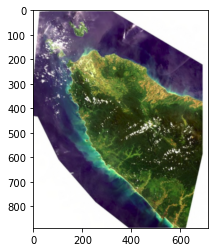

In [7]:
imgMoy=lisse('naturalIMGbeforeTRT.jpg',np.array([[1,1,1],
                                                 [1,1,1],
                                                 [1,1,1]]) )

mpimg.imsave('Q2-filtre-lineaire-moyenneur.jpg',imgMoy,cmap="gray");  


plt.imshow(imgMoy)
plt.show()


### image gausséen

1
moy= 16
operation fait dans 17070912 iteration


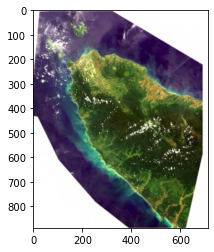

In [8]:
imgGauss=lisse('naturalIMGbeforeTRT.jpg',np.array([[1,2,1],
                                                   [2,4,2],
                                                   [1,2,1]]) )


mpimg.imsave('Q2-filtre-lineaire-gausseenne.jpg',imgGauss,cmap="gray");  


plt.imshow(imgGauss)
plt.show()


# filtre non lineaire
## (comme on a fait au filtre lineaire on fait une fonction lineaire mais un arg string qui decide le genre exact du filtre)

In [9]:
def FiltreNonLineaire(ImageFile,v,kind):
    #kind is an input string of choice filtre bas
    #img input image
    #k nb des lines ou colone symetrique pour chaque filtre moyenne de taille impair
    #v est un filtre:
    img=mpimg.imread(ImageFile)

    #deduction de k (nb des 2 dans la taille du filtre)
    sizex,sizey,c=img.shape
    
    vx,vy=v.shape
    k=int(vx/2)
    print(k)
    
    maqam=0    #maqam est somme de tous les elt du filtre
    
    #calcul du var maqam
    i=0    
    while(i<=2*k+1-1):
        j=0
        while(j<=2*k+1-1):
            maqam=maqam+v[i,j]
            j=j+1
        i=i+1
    
    print("moy=",maqam)
    
    ir=np.zeros([sizex+2*k, sizey+2*k, 3]) 
    #ir est la future image resultat
    #on ajoute k au longeur et largeur  car on veut le filtrage sans effet de bord par
    #remplissage des zeros
    
    #remplissage 
    #for i in range (k,sizex+k-1):
     #   for j in range (k,sizey+k-1):
    #      ir[i,j,:]=img[i-k,j-k,:]
    
    
    
    for c in range(3):
        for x in range(k,sizex+k-1):
            #print(x,y)
            for y in range(k,sizey+k-1):

                s=[]
                ii=k
                while(ii>=(-1)*k):
                    j=0
                    jj=(-1)*k
                    while(jj<=k):
                        if (x+ii<0 or y+jj<0):
                            continue
                        if( x+ii>=sizex or y+jj>=sizey):
                            break
                        else:
                            s.append(img[int(x+ii),int(y+jj),c])
                        jj=jj+1
                    ii=ii-1
                    
                    if(kind=='min'):
                        ir[int(x),int(y),c]=min(s)/255
                    elif(kind=='max'):
                        ir[int(x),int(y),c]=max(s)/255
                    else:
                        ir[int(x),int(y),c]=np.median(s)/255

    if(kind=='min'):
        r="test-Min.jpg"
    elif(kind=='max'):
        r="test-Max.jpg"
    else:
        r="test-Median.jpg"
    
    
    mpimg.imsave(r,ir,cmap="gray");  
    print("operation fait ")
    #plt.imshow(ir)
    #plt.show()
    return ir        
         


v=np.ones((3,3)) 



## filtre median

1
moy= 9.0
operation fait 


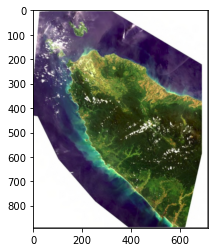

In [12]:
imgMedian=FiltreNonLineaire('naturalIMGbeforeTRT.jpg',v ,'median')
mpimg.imsave('Q2-flt-non-linear-median.png',imgMedian,cmap="gray");  
plt.imshow(imgMedian)
plt.show()


## filtre max

In [14]:
imgMax=FiltreNonLineaire('naturalIMGbeforeTRT.jpg',v ,'max')
mpimg.imsave('Q2-flt-non-linear-max.png',imgMax,cmap="gray");  
plt.imshow(imgMax)
plt.show()

1
moy= 9.0


ValueError: max() arg is an empty sequence